# Introducción a la regresión lineal
Este notebook se basa en el artículo https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

La regresión lineal permite predecir una variable cuantitativa, como el precio de una casa o la calidad de un vino. Se denomina *lineal* porque asume una relación que en un gráfico bidimensional se puede representar como una recta:

![Relación lineal](../img/linear.png)

La ecuación de esta recta es:

## $Y = b_0 + b_1 x$

donde $x$ es la variable del eje horizontal, $Y$ la del eje vertical, $b_0$ es la ordenada en el origen (valor de $Y$ cuando $x$ es 0), y $b_1$ es la pendiente de la recta. En lugar de utilizar una única variable $x$ para predecir $Y$ podemos usar muchas variables $x_1$, $x_2$, ..., $x_n$:

## $Y = b_0 + b_1 x_1 + b_2 x_2 + \cdots + b_n x_n$

Esta ecuación en lugar de una recta representa un *hiperplano*, que aunque conceptualmente es mucho más complejo, matemáticamente es equivalente para el ordenador: la técnica para operar es la misma. A grandes rasgos, se trata de colocar la recta lo más cerca posible de los puntos sobre los que se ajusta. Matemáticamente se trata de un problema de minimización de errores.

![Relación lineal](../img/linear_ani.gif)

Utilizaremos la regresión lineal para predecir el valor de una vivienda en función de algunas de sus características. Descargamos el dataset, lo cargamos en Colab y cargamos las librerías que necesitaremos en el análisis.

In [1]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
!wget -P ./../data/ https://raw.githubusercontent.com/CenticMurcia/curso-ciencia-datos/master/data/house_prices_train.csv

--2020-02-10 19:19:58--  https://raw.githubusercontent.com/CenticMurcia/curso-ciencia-datos/master/data/house_prices_train.csv
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.128.133, 151.101.64.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[151.101.192.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 404 Not Found
2020-02-10 19:19:58 ERROR 404: Not Found.



In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [3]:
dataset = pd.read_csv('../data/house-prices-train.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Vemos que el dataset tiene 1460 filas (casas) y 81 columnas (características de las casas). Si queréis una descripción detallada de lo que representa cada variable podéis echar un vistazo aquí:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Vamos a predecir con la mayor precisión posible el precio de la vivienda en función de las variables de que disponemos. Para simplificar el problema vamos a seleccionar un número limitado de variables que podemos considerar a priori como importantes:

* OverallQual: Calidad general de los materiales y las terminaciones
* GrLivArea: Superficie habitable sobre la planta baja en pies cuadrados
* GarageCars: Cuántos coches caben en el garage
* GarageArea: Superficie del garaga en pies cuadrados
* TotalBsmtSF: Superficie total del sótano
* 1stFlrSF: Superficie total de la primera planta
* FullBath: Baños completos
* TotRmsAbvGrd: Número de habitaciones sobre la planta baja
* YearBuilt: Año de construcción
* YearRemodAdd: Año de remodelación




In [6]:
dataset = dataset[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
                   'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 
                   'YearBuilt', 'YearRemodAdd', 'SalePrice']]

In [7]:
dataset.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,6.517808,1971.267808,1984.865753,180921.195890
std,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,1.625393,30.202904,20.645407,79442.502883
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1950.000000,34900.000000
25%,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,5.000000,1954.000000,1967.000000,129975.000000
50%,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,6.000000,1973.000000,1994.000000,163000.000000
75%,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,7.000000,2000.000000,2004.000000,214000.000000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000,2010.000000,755000.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
OverallQual     1460 non-null int64
GrLivArea       1460 non-null int64
GarageCars      1460 non-null int64
GarageArea      1460 non-null int64
TotalBsmtSF     1460 non-null int64
1stFlrSF        1460 non-null int64
FullBath        1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(11)
memory usage: 125.6 KB


Tenemos ahora 1460 filas y 11 columnas de variables cuantitativas, sin valores perdidos. Podemos hacer un EDA básico:

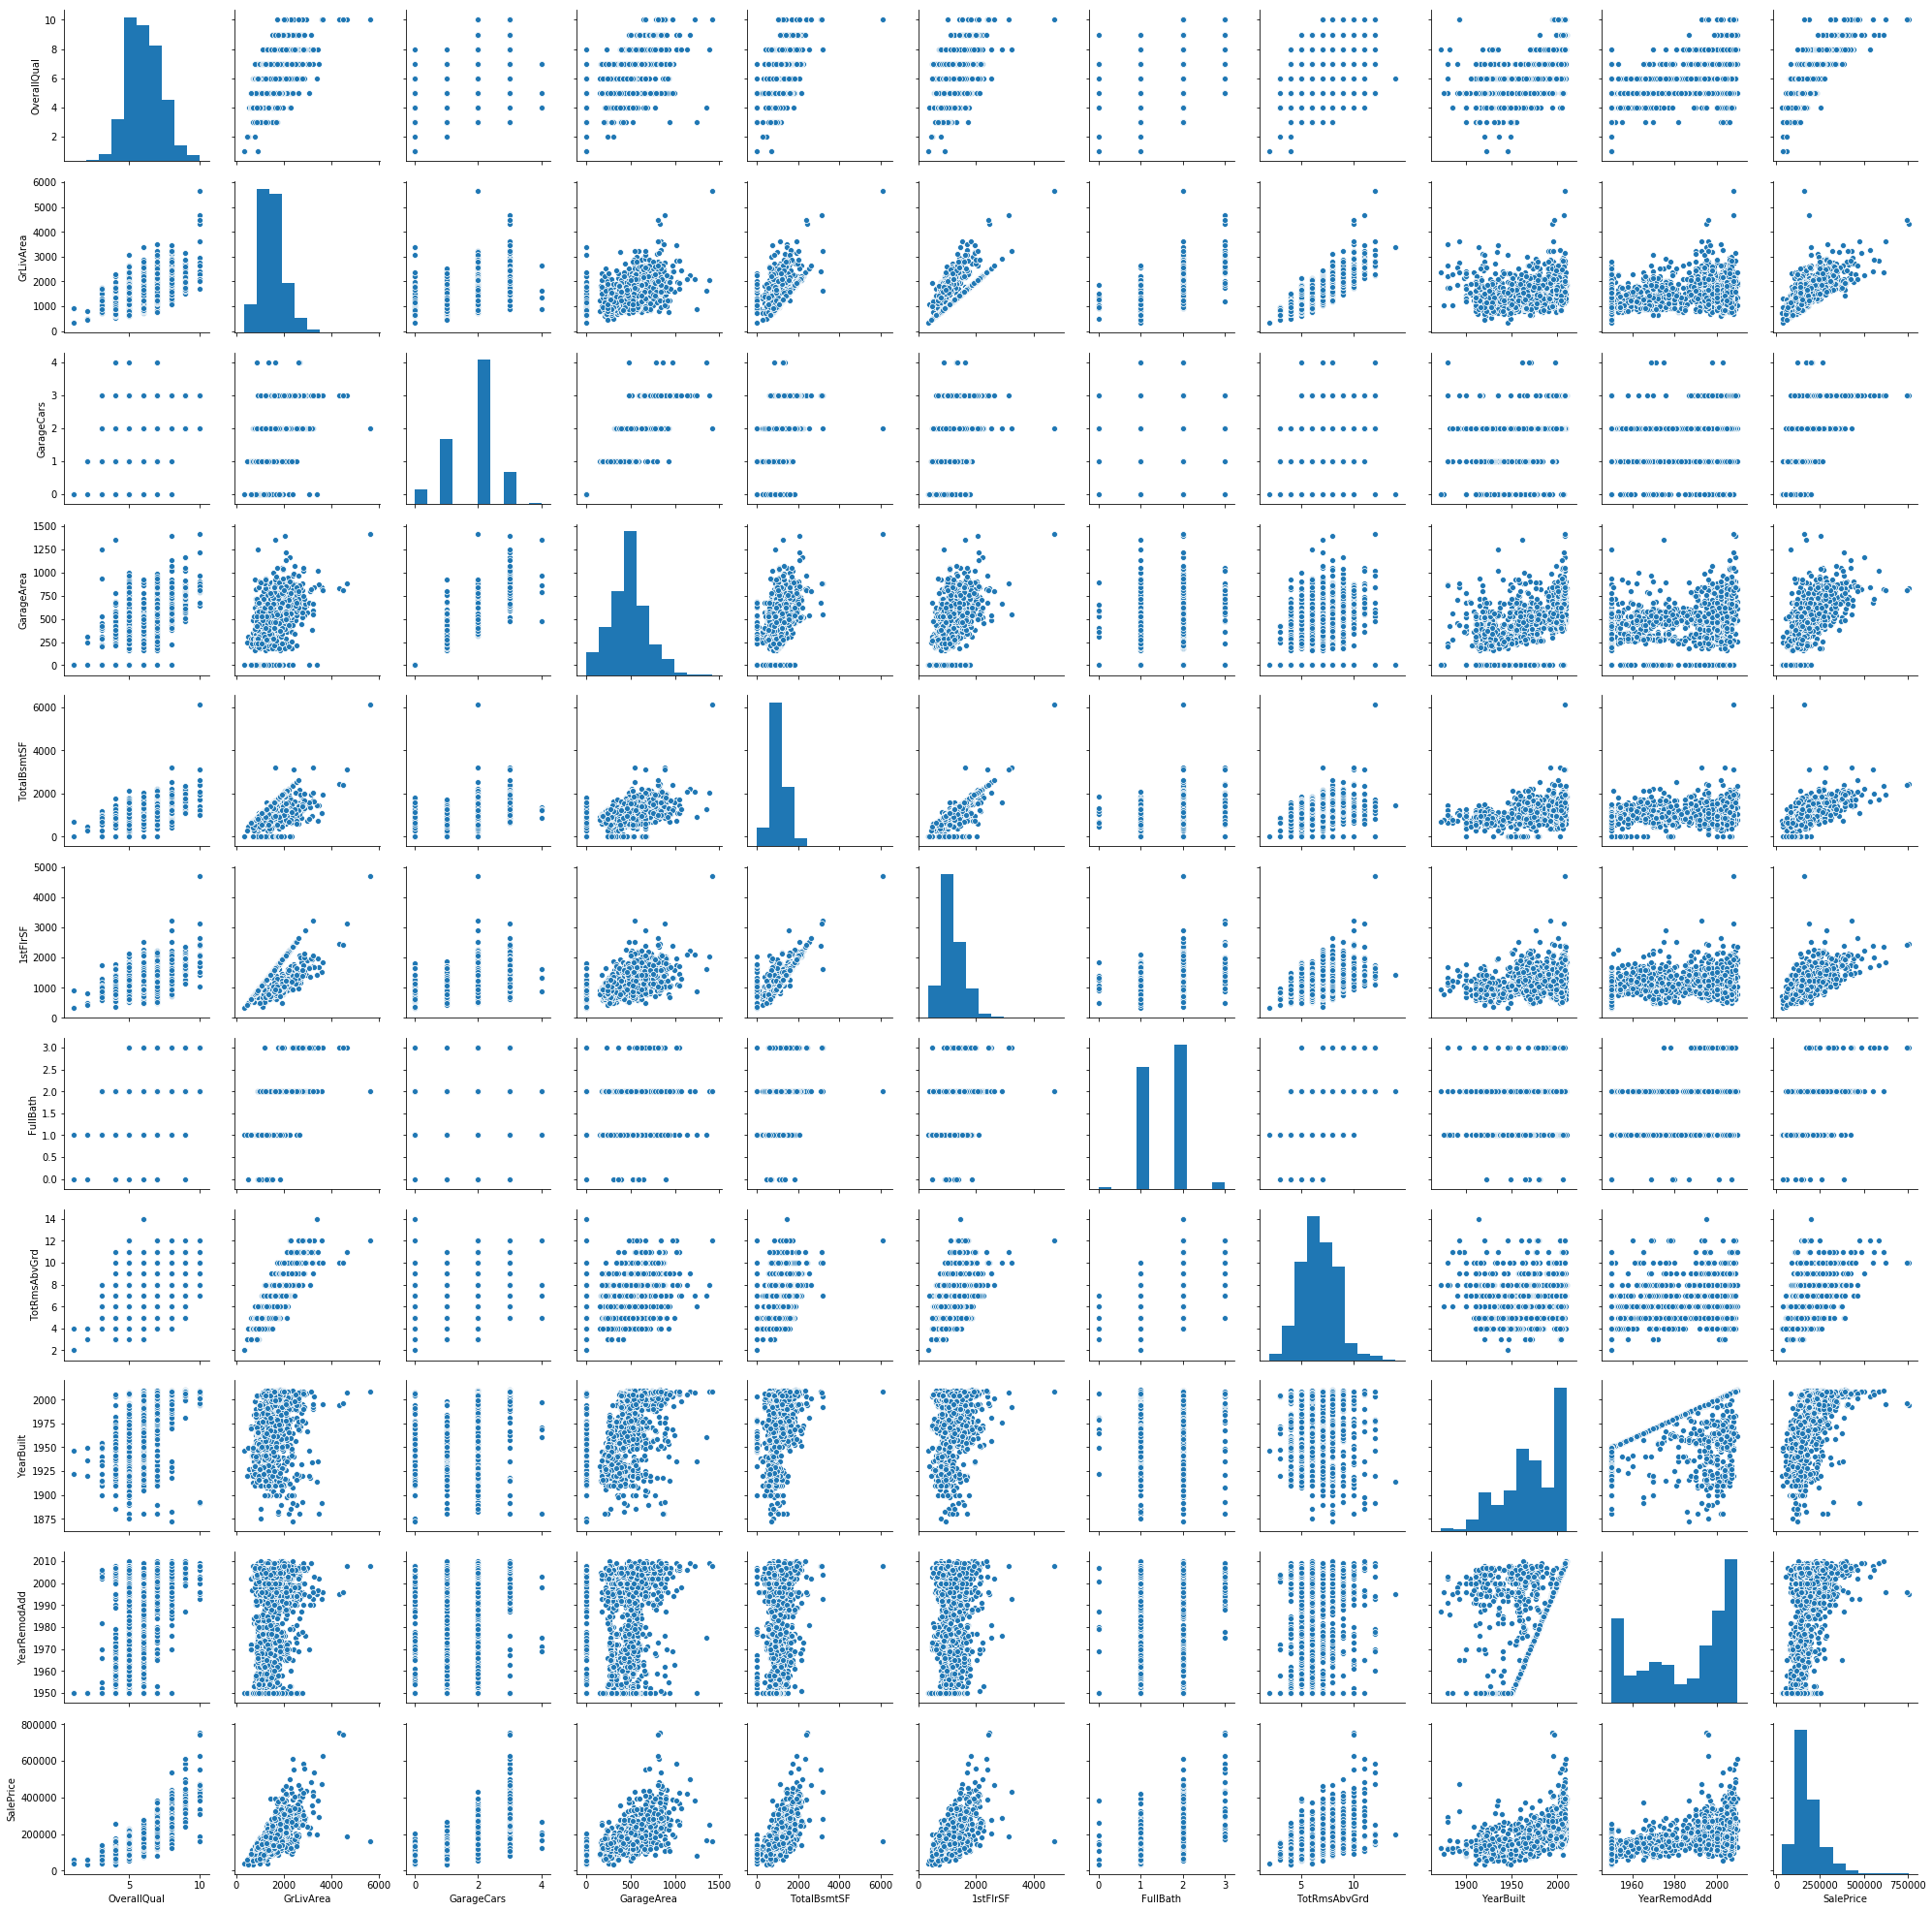

In [9]:
g = sns.pairplot(dataset)

Vemos que hay varias variables que parecen estar correlacionadas con SalePrice (última fila). Podemos hacer un gráfico de correlación:

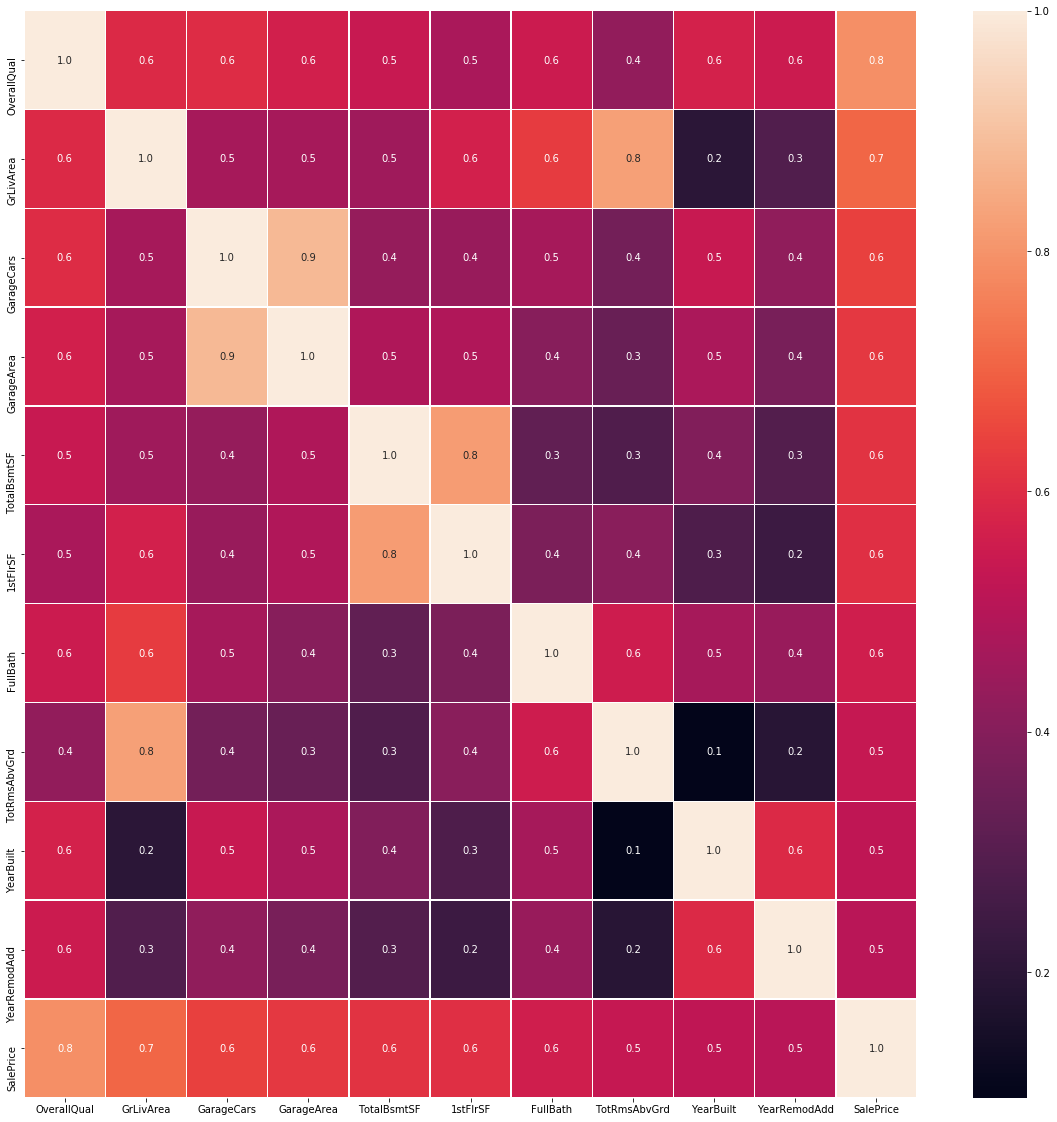

In [10]:
f, ax = plt.subplots(figsize=(20, 20))
g = sns.heatmap(dataset.corr(), annot=True, linewidths=0.4, fmt='.1f', ax=ax)

Un factor de correlación entre dos variables igual a 1 indica correlación positiva perfecta: cuando una variable crece, la otra lo hace al mismo ritmo. Si es -1, cuando una crece la otra decrece. Una correlación de 0 indica que ambas variables se comportan de manera totalmente independiente. Todas las variables que hemos seleccionado tienen coeficientes de correlación iguales o mayores de 0.5 con SalePrice, por lo que esperamos que nos aporten información que nos permita predecir el precio de venta de una casa.

Aunque las variables GarageCars y FullBaths son cualitativas, se comportan más bien como categorías, ya que tienen muy pocos posibles valores: GarageCars oscila entre 0 y 4, y FullBaths entre 0 y 3. Hagamos una representación con *violinplots*. Vemos que efectivamente el precio se incrementa de manera aproximadamente lineal con ambas, aunque curiosamente cuando GarageCars es 4 el precio baja.

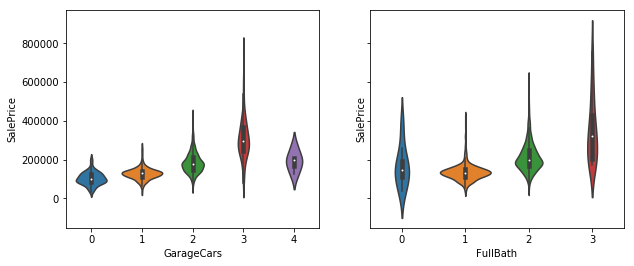

In [11]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

g = sns.violinplot(x=dataset['GarageCars'], y=dataset['SalePrice'], ax=axes[0])
g = sns.violinplot(x=dataset['FullBath'], y=dataset['SalePrice'], ax=axes[1])

Ahora creamos el dataset de entrenamiento con el 70% de los datos y el de test con el 30% restante:

In [12]:
features = dataset.drop(columns='SalePrice')
targets = pd.DataFrame(dataset['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, 
                                                    random_state = 42)

Ya podemos entrenar un modelo lineal, hacer predicciones y calcular algunos parámetros de calidad:

In [13]:
lr = LinearRegression()
    
# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

In [14]:
# The mean squared error
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R2): %.2f'
      % metrics.r2_score(y_test, y_pred))

Mean squared error: 1387787630.82
Coefficient of determination (R2): 0.80


Vemos que el modelo es razonablemente bueno ($R² = 0.80$). Vamos a representar las predicciones y los precios correctos, para ver las diferencias. Si las predicciones son buenas deben aparecer puntos muy cercanos a la diagonal de la gráfica, marcada en rojo:

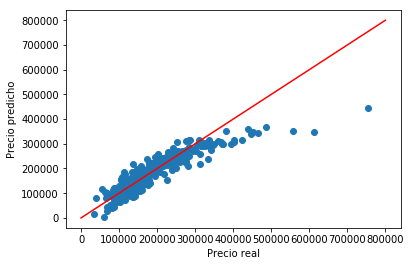

In [15]:
x = np.linspace(0, 800000, 800001)
plt.scatter(x = y_test, y = y_pred)
plt.plot(x, x, 'r-')

plt.xlabel('Precio real')
plt.ylabel('Precio predicho')

plt.show()

Otra manera de estudiar la calidad del modelo es representar el error en la predicción (y_pred - y_test), también denominado *residuo* frente al valor predicho (y_pred). Esta representación nos permitirá estimar la magnitud del error de nuestras predicciones:

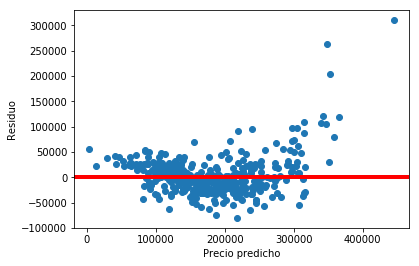

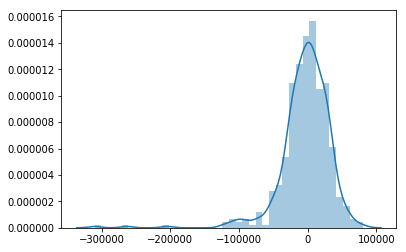

In [16]:
plt.scatter(x = y_pred, y = y_test-y_pred)
plt.axhline(y=0, linewidth=4, color='r')

plt.xlabel('Precio predicho')
plt.ylabel('Residuo')

plt.show()

sns.distplot(y_pred-y_test);

Idealmente los residuos deben repartirse homogéneamente alrededor de cero (línea roja), pero vemos que no es así. El precio de las casas más baratas (hasta 100000 dólares) parece estar sobre-estimado. Las casa de entre 150000 y 200000 dólares está infra-valoradas, y por encima de 300000 dólares vuelven a estar de nuevo sobre-valoradas. En promedio, el error oscila entre $\pm 80000$ dólares aproximadamente. Este típo de gráficas son muy útiles para evaluar los modelos de regresión, se hayan creado usando técnicas lineales u otras más sofisticadas: las representaciones son igualmente válidas.

Vamos a echar un vistazo a los coeficientes del modelo, que nos indican cómo afecta cada variable al precio final predicho de la casa:

In [17]:
pd.DataFrame(zip(X_train.columns, lr.coef_[0].tolist()), columns = ['Names', 'Coefs'])

,Names,Coefs
0,OverallQual,19706.155920
1,GrLivArea,46.415115
2,GarageCars,14181.862962
3,GarageArea,7.521263
4,TotalBsmtSF,12.057829
5,1stFlrSF,15.303836
6,FullBath,-6968.063288
7,TotRmsAbvGrd,594.193773
8,YearBuilt,289.106875
9,YearRemodAdd,304.456332


Vemos que por cada unidad que se incrementa la calidad de la casa (OverallQual), el precio se incrementa en 19706 dólares, por cada pie cuadrado que se incrementa la superficie en la planta baja (GrLivArea) el precio aumenta 46.4 dólares, etc. Se puede observar que el precio del pie cuadrado de garaje es bastante más bajo que el de vivienda (7.5 dolares).

Para mejorar el modelo podríamos, por ejemplo, dividir los datos en dos partes (las casas por debajo de 300000 dólares y las que están por encima de ese valor) y crear dos modelos distintos. A la hora de hacer una predicción con nuevos datos usaríamos los dos modelos, el *barato* y el *caro*. Si usamos el modelo *barato* con datos nuevos y nos sale una predicción mayor de 300000 dólares, la descartamos y usamos el modelo *caro*, y viceversa.

Mean squared error: 672155423.89
Coefficient of determination (R2): 0.74


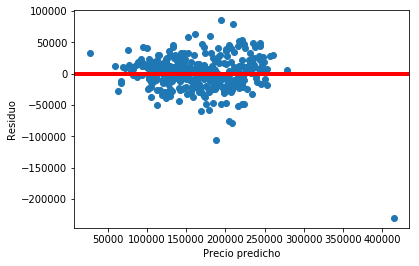

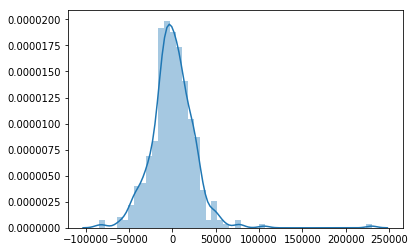

In [18]:
# Modelo BARATO

features = dataset[dataset['SalePrice'] < 300000].drop(columns='SalePrice')
targets = pd.DataFrame(dataset['SalePrice'][dataset['SalePrice'] < 300000])

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, 
                                                    random_state = 42)

lr_barato = LinearRegression()
    
# Train the model
lr_barato.fit(X_train, y_train)

# Make predictions
y_pred = lr_barato.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R2): %.2f'
      % metrics.r2_score(y_test, y_pred))

plt.scatter(x = y_pred, y = y_test-y_pred)
plt.axhline(y=0, linewidth=4, color='r')

plt.xlabel('Precio predicho')
plt.ylabel('Residuo')

plt.show()

sns.distplot(y_pred-y_test);

Mean squared error: 2925961612.43
Coefficient of determination (R2): 0.58


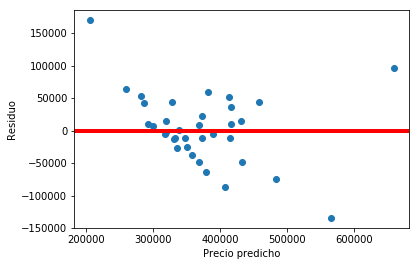

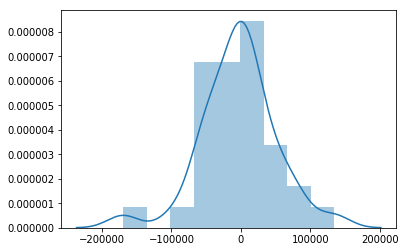

In [19]:
# Modelo CARO

features = dataset[dataset['SalePrice'] >= 300000].drop(columns='SalePrice')
targets = pd.DataFrame(dataset['SalePrice'][dataset['SalePrice'] >= 300000])

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, 
                                                    random_state = 42)

lr_caro = LinearRegression()
    
# Train the model
lr_caro.fit(X_train, y_train)

# Make predictions
y_pred = lr_caro.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R2): %.2f'
      % metrics.r2_score(y_test, y_pred))

plt.scatter(x = y_pred, y = y_test-y_pred)
plt.axhline(y=0, linewidth=4, color='r')

plt.xlabel('Precio predicho')
plt.ylabel('Residuo')

plt.show()

sns.distplot(y_pred-y_test);

Vemos que el modelo *barato* funciona bastante bien, aunque hay una casa con un error muy grande, aquella para la que se predice un coste de más de 400000 dólares y finalmente termina costando menos de 300000 (ojo, esta casa pordía resultar una verdadera ganga, aunque su verdadero precio debería determinarse con el modelo *caro*). El error oscila entre $\pm 50000$ dólares. Por el contrario, el modelo de las casas caras funciona bastante peor, con unos errores que se desvían bastante de la línea roja y que oscilan entre $\pm 100000$ dólares, casi el doble.